# QCNN性能测试2

Training with data for 0.5 < Γ and Γ > 1.5

In [1]:
import numpy as np
import mindspore as ms
from mindspore.dataset import NumpySlicesDataset
from mindspore.train.callback import LossMonitor, Callback
from src.dataset import build_dataset
from src.qcnn import QCNNet
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

#### N=4

In [4]:
N = 4
path = './TFI_chain/closed/'
encoder, encoder_params_name, x, y = build_dataset(N, path)
x = x[y!=0]
y = y[y!=0]
x_train = np.concatenate((x[:15], x[65:]))
y_train = np.array([-1]*15+[1]*15)
x_train.shape

(30, 4)

In [5]:
from mindspore.train.callback import Callback
class StepAcc(Callback):
    def __init__(self, model, test_x, test_y):
        self.model = model
        self.test_x = test_x
        self.test_y = test_y.flatten()
        self.acc = []

    def step_end(self, run_context):
        pred_y = self.model.predict(self.test_x)
        self.acc.append((self.test_y == pred_y).mean())

In [6]:
batch = 30
epoch = 100
ms.set_seed(1202)
model = QCNNet(N, encoder)
y_train = y_train.reshape((y_train.shape[0], -1))
train_loader = NumpySlicesDataset({'features': x_train, 'labels': y_train}, shuffle=False).batch(batch)
monitor = LossMonitor(1)
acc = StepAcc(model, x, y)
callbacks=[monitor, acc]
model.train(epoch, train_loader, callbacks)

epoch: 1 step: 1, loss is 0.7433044910430908
epoch: 2 step: 1, loss is 0.6581213474273682
epoch: 3 step: 1, loss is 0.6380529403686523
epoch: 4 step: 1, loss is 0.6130697727203369
epoch: 5 step: 1, loss is 0.5836294889450073
epoch: 6 step: 1, loss is 0.5833531618118286
epoch: 7 step: 1, loss is 0.5892293453216553
epoch: 8 step: 1, loss is 0.5827130079269409
epoch: 9 step: 1, loss is 0.5696002840995789
epoch: 10 step: 1, loss is 0.5626639723777771
epoch: 11 step: 1, loss is 0.5628583431243896
epoch: 12 step: 1, loss is 0.5646248459815979
epoch: 13 step: 1, loss is 0.5647491216659546
epoch: 14 step: 1, loss is 0.5648906826972961
epoch: 15 step: 1, loss is 0.5664368867874146
epoch: 16 step: 1, loss is 0.5647938251495361
epoch: 17 step: 1, loss is 0.559933602809906
epoch: 18 step: 1, loss is 0.5556755065917969
epoch: 19 step: 1, loss is 0.553419291973114
epoch: 20 step: 1, loss is 0.553244411945343
epoch: 21 step: 1, loss is 0.5543888807296753
epoch: 22 step: 1, loss is 0.5552183985710144


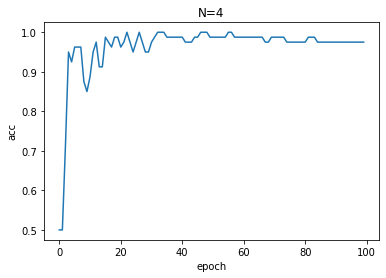

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(len(acc.acc)), acc.acc)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('N=4')
plt.show()

反正loss和acc都挺收敛的，看上去似乎有点过拟合了~

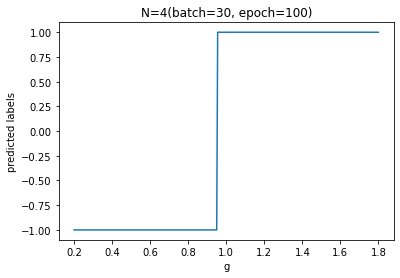

In [8]:
_, _, x, y = build_dataset(N, path, 3)
pred_y = model.predict(x)
plt.plot(np.linspace(0.2,1.8,pred_y.shape[0]), pred_y)
plt.title('N=4(batch=30, epoch=100)')
plt.ylabel('predicted labels')
plt.xlabel('g')
plt.show()

还挺好

#### N=8

In [10]:
N = 8
path = './TFI_chain/closed/'
encoder, encoder_params_name, x, y = build_dataset(N, path)
x = x[y!=0]
y = y[y!=0]
x_train = np.concatenate((x[:15], x[65:]))
y_train = np.array([-1]*15+[1]*15)
batch = 30
epoch = 50 # 这次少点~
ms.set_seed(1202)
model = QCNNet(N, encoder)
y_train = y_train.reshape((y_train.shape[0], -1))
train_loader = NumpySlicesDataset({'features': x_train, 'labels': y_train}, shuffle=False).batch(batch)
monitor = LossMonitor(10)
acc = StepAcc(model, x, y)
callbacks=[monitor, acc]
model.train(epoch, train_loader, callbacks)

epoch: 10 step: 1, loss is 0.5315335392951965
epoch: 20 step: 1, loss is 0.5086298584938049
epoch: 30 step: 1, loss is 0.4959692060947418
epoch: 40 step: 1, loss is 0.486843466758728
epoch: 50 step: 1, loss is 0.47491976618766785


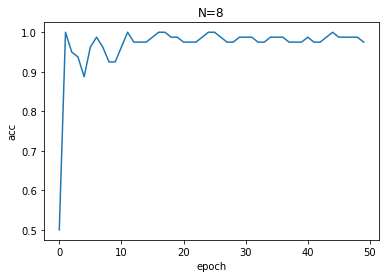

In [11]:
plt.plot(range(len(acc.acc)), acc.acc)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('N=8')
plt.show()

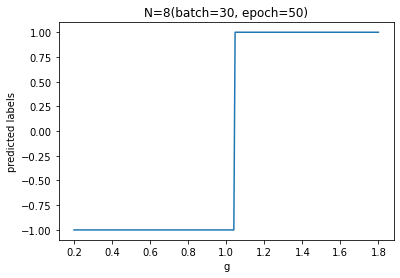

In [12]:
_, _, x, y = build_dataset(N, path, 2)
pred_y = model.predict(x)
plt.plot(np.linspace(0.2,1.8,pred_y.shape[0]), pred_y)
plt.title('N=8(batch=30, epoch=50)')
plt.ylabel('predicted labels')
plt.xlabel('g')
plt.show()

。。。
epoch取个2试试

epoch: 1 step: 1, loss is 0.6604666113853455
epoch: 2 step: 1, loss is 0.6270714402198792


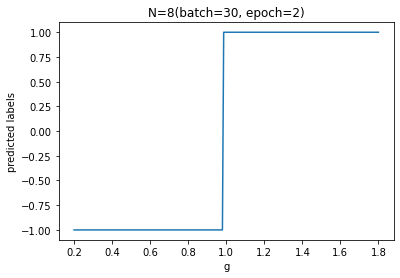

In [13]:
N = 8
path = './TFI_chain/closed/'
encoder, encoder_params_name, x, y = build_dataset(N, path)
x = x[y!=0]
y = y[y!=0]
x_train = np.concatenate((x[:15], x[65:]))
y_train = np.array([-1]*15+[1]*15)
batch = 30
epoch = 2
ms.set_seed(1202)
model = QCNNet(N, encoder)
y_train = y_train.reshape((y_train.shape[0], -1))
train_loader = NumpySlicesDataset({'features': x_train, 'labels': y_train}, shuffle=False).batch(batch)
monitor = LossMonitor(1)
callbacks=[monitor]
model.train(epoch, train_loader, callbacks)
_, _, x, y = build_dataset(N, path, 2)
pred_y = model.predict(x)
plt.plot(np.linspace(0.2,1.8,pred_y.shape[0]), pred_y)
plt.title('N=8(batch=30, epoch=2)')
plt.ylabel('predicted labels')
plt.xlabel('g')
plt.show()

很好很好

#### N=12

In [16]:
N = 12
path = './TFI_chain/closed/'
encoder, encoder_params_name, x, y = build_dataset(N, path)
x = x[y!=0]
y = y[y!=0]
x_train = np.concatenate((x[:15], x[65:]))
y_train = np.array([-1]*15+[1]*15)
batch = 30
epoch = 10 # 跑个10意思一下
ms.set_seed(1202)
model = QCNNet(N, encoder)
y_train = y_train.reshape((y_train.shape[0], -1))
train_loader = NumpySlicesDataset({'features': x_train, 'labels': y_train}, shuffle=False).batch(batch)
monitor = LossMonitor(1)
acc = StepAcc(model, x, y)
callbacks=[monitor, acc]
model.train(epoch, train_loader, callbacks)

epoch: 1 step: 1, loss is 0.6997095942497253
epoch: 2 step: 1, loss is 0.6937258839607239
epoch: 3 step: 1, loss is 0.6671553254127502
epoch: 4 step: 1, loss is 0.6626603603363037
epoch: 5 step: 1, loss is 0.6395025849342346
epoch: 6 step: 1, loss is 0.6295544505119324
epoch: 7 step: 1, loss is 0.6101098656654358
epoch: 8 step: 1, loss is 0.6068440079689026
epoch: 9 step: 1, loss is 0.6036085486412048
epoch: 10 step: 1, loss is 0.5963594913482666


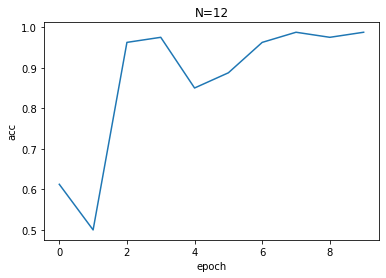

In [17]:
plt.plot(range(len(acc.acc)), acc.acc)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('N=12')
plt.show()

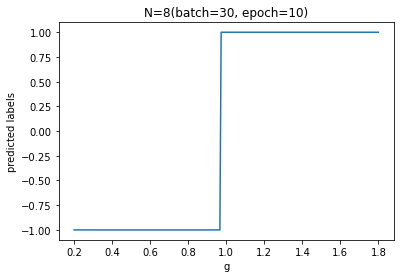

In [18]:
_, _, x, y = build_dataset(N, path, 2)
pred_y = model.predict(x)
plt.plot(np.linspace(0.2,1.8,pred_y.shape[0]), pred_y)
plt.title('N=8(batch=30, epoch=10)')
plt.ylabel('predicted labels')
plt.xlabel('g')
plt.show()

## 结论

我们可以通过QCNN推断出TFIM的量子相变临界点的Γ的值。